In [1]:
from PIL import Image
import requests
import os
import json
import matplotlib.pyplot as plt
import torch

from transformers import CLIPProcessor, CLIPModel

from lib import get_ids, get_images, get_titles

In [2]:
search_file = "searches/full_100_2022-03-21_17_18_01.json"
image_dir = "images/"

In [4]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [5]:
# read search_file
with open(search_file, "r") as f:
    search = json.load(f)

ids = get_ids(search)
titles = get_titles(search)
images = get_images(search, image_dir)

In [6]:
def get_logits(text, images):
    inputs = processor(text=text, images=images, return_tensors="pt", padding=True)
    # inputs = inputs.cuda()
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
    logits_per_image = logits_per_image.detach().cpu().numpy()
    return logits_per_image

In [7]:
logits = get_logits(titles, images)

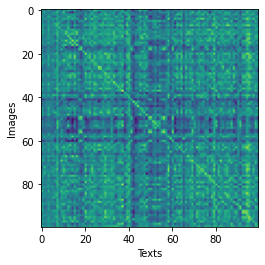

In [8]:
plt.imshow(logits)
# label y axis with "Images"
plt.ylabel("Images")
# label x axis as "Texts"
plt.xlabel("Texts")
plt.show()
# print all the post urls
# for i, post_id in enumerate(search):
#     print(i, search[post_id]["url"])


In [12]:
query = "A modern looking rug"
probs = get_logits(query, images).squeeze()
sorted_inds = probs.argsort()[::-1]


=====0=====
Custom Built White Bench
https://westernmass.craigslist.org/fuo/d/west-springfield-custom-built-white/7460795479.html


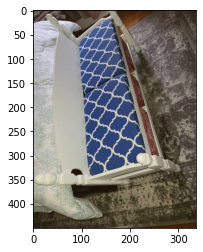

=====1=====
Free Medicine Cabinet
https://westernmass.craigslist.org/fuo/d/hadley-free-medicine-cabinet/7461043975.html


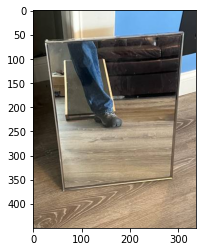

=====2=====
Moving Selling family room pieces
https://westernmass.craigslist.org/fuo/d/framingham-moving-selling-family-room/7458560223.html


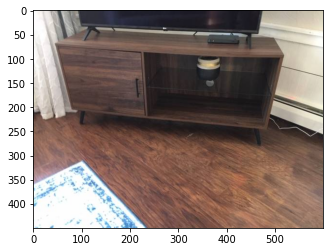

=====3=====
Loveseat
https://westernmass.craigslist.org/fuo/d/hadley-loveseat/7460750432.html


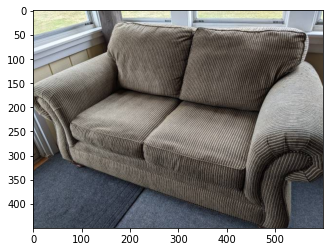

=====4=====
❗King Plush Mattress - New in Plastic❗
https://westernmass.craigslist.org/fuo/d/holyoke-king-plush-mattress-new-in/7461016687.html


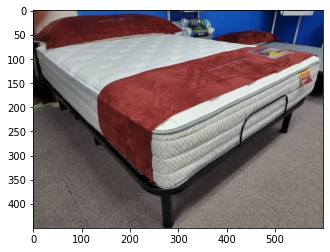

=====5=====
Large Maple Mirror
https://westernmass.craigslist.org/fuo/d/southwick-large-maple-mirror/7461031537.html


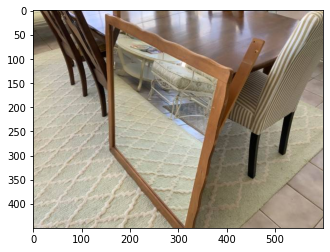

=====6=====
💥 Queen Mattress - NEW in plastic 💥
https://westernmass.craigslist.org/fuo/d/holyoke-queen-mattress-new-in-plastic/7454943392.html


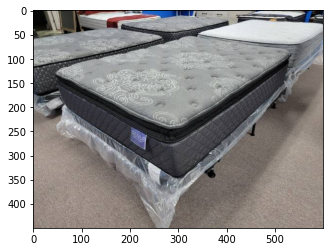

=====7=====
Vintage Woodard Wrought Iron End Tables Set of 2
https://westernmass.craigslist.org/fuo/d/west-springfield-vintage-woodard/7459312674.html


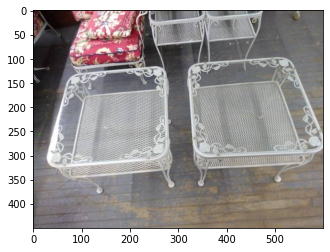

=====8=====
ELECTIC RECLINER BY BEST CHAIR
https://westernmass.craigslist.org/fuo/d/chicopee-electic-recliner-by-best-chair/7460798398.html


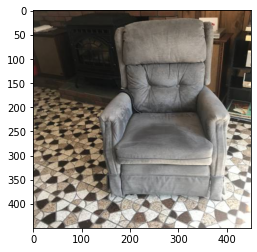

=====9=====
👉 Sectional Brand NEW!!! 👈
https://westernmass.craigslist.org/fuo/d/holyoke-sectional-brand-new/7454954121.html


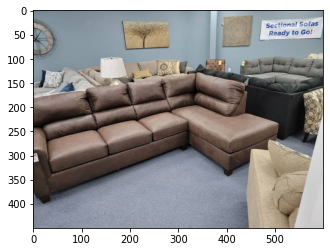

In [13]:
for i in range(10):
    image = images[sorted_inds[i]]
    post_id = ids[sorted_inds[i]]
    post = search[post_id]
    print(f"====={i}=====")
    print(post["name"])
    print(post["url"])
    # show the image with the highest probability
    plt.imshow(image)
    plt.show()


In [ ]:
inputs = processor(text=titles[:10], images=images[:10], return_tensors="pt", padding=True)
outputs = model(**inputs)